# Model

As shown previously, when `Simulation.from_config()` is called, a `SimulationState` object is created. This is done via the class method `SimulationState.from_config()`. This model object contains important information about the shell structure, density, abundance, radiative temperature, and dilution factor throughout the supernova.

Throughout this notebook, we show various configuration inputs into the TARDIS model and the resulting model. In interactive mode, these parameters can be varied to explore how the model changes. Editing configuration parameters in the notebook is explained [here](../../io/configuration/tutorial_read_configuration.ipynb).

This notebook is based on the [built-in TARDIS models](../../io/configuration/components/models/index.rst#built-in-structure-density-and-abundance), but these parameters can also be input via [custom model configurations](../../io/configuration/components/models/index.rst#custom-model-configurations), the [CSVY model](../../io/configuration/components/models/index.rst#csvy-model) or the [custom abundance widget](../../io/visualization/how_to_abundance_widget.ipynb).

## Shell Structure

TARDIS models supernovae as expanding homologously. This means that at the beginning of the explosion, the
supernova starts at a single point and proceeds to expand radially outward such that the ratio of the velocity of
the ejecta to the distance from the ejecta to the supernova's center is uniform throughout the supernova. As an
example, if the outer edge of the ejecta moves outward at some velocity $v_\mathrm{boundary\_outer}$, the
velocity of the ejecta half way between the outer edge and the center would be
$\frac{v_\mathrm{boundary\_outer}}{2}$. The animation below demonstrates this type of expansion.

TARDIS simulates radiative transfer between an inner boundary (the photosphere) and an outer
boundary (the outer edge of the supernova ejecta). The velocity of the inner boundary
$v_\mathrm{boundary\_inner}$ and the velocity of the outer boundary $v_\mathrm{boundary\_outer}$ are
supplied in the configuration file, as well as the time after the explosion for
which TARDIS is calculating the spectrum ($t_\mathrm{explosion}$). The radii of the inner and outer boundaries
are therefore calculated by $r_\mathrm{boundary\_inner}=v_\mathrm{boundary\_inner}*t_\mathrm{explosion}$ and
$r_\mathrm{boundary\_outer}=v_\mathrm{boundary\_outer}*t_\mathrm{explosion}$. Plasma at a distance $r$
from the center of the supernova would then be traveling outward at a speed $v=\frac{r}{r_\mathrm{boundary\_outer}}v_\mathrm{boundary\_outer} = \frac{r}{t_\mathrm{explosion}}$. This is
also shown in the animation.

Additionally, TARDIS divides the space between the inner and outer computational boundaries into cells -- radial
shells for which the state/condition of the ejecta is (spatially) constant. In the animation, 6 cells are shown,
being divided by the light blue lines. As TARDIS is a time-independent code which calculates the spectra at an
instant in time, the radii of the boundaries (either of the computational domain or of the cells) do not change
throughout the simulation.


<img width="500" src="../images/expansion_animation.gif">

We now demonstrate how the shell structure works using the TARDIS code.

In [1]:
# We import the necessary packages
from tardis.io.configuration.config_reader import Configuration
from tardis.model import SimulationState
from tardis.io.atom_data import download_atom_data
from tardis.io.atom_data.base import AtomData
from astropy import units as u
import matplotlib.pyplot as plt
import copy

# We download the atomic data needed to run the simulation
download_atom_data('kurucz_cd23_chianti_H_He')
atom_data = AtomData.from_hdf('kurucz_cd23_chianti_H_He.h5')

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Atomic Data kurucz_cd23_chianti_H_He already exists in /home/runner/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5. Will not download - override with force_download=True.


In [2]:
# Set up a base configuration to use throughout the notebook
base_config = Configuration.from_yaml("tardis_example.yml")

In the cell below, we set up a model. We use the [specific structure](../../io/configuration/components/models/index.rst#specific-structure) where we supply $t_\mathrm{explosion}$, the velocity of the inner and outer boundaries of the supernova (labeled `start` and `stop`), and the number of shells (labeled `num`). The shells are then evenly spaced between the inner and outer boundaries of the supernova. The time after the explosion, the inner and outer velocities, and the number of shells can be varied to get different shell structures. The `SimulationState` object stores information about the model in the following attributes: `velocity` shows the velocity of the shell boundaries, `v_inner` shows the velocities of the inner boundaries of each shell, `v_outer` shows the velocity of the outer boundaries of each shell, and `v_middle` shows the velocity of the middle of each shell. Similarly, `radius`, `r_inner`, `r_outer`, and `r_middle` show the radii of each shell boundary, the inner boundaries, the outer boundaries, and the middles of each shell, respectively. `v_inner_boundary` shows the velocity of the inner boundary of the computational domain, and `v_outer_boundary` shows the velocity of the outer boundary of the computational domain. Finally, `volume` shows the volume of each shell, calculated via the formula of the volume of a spherical shell: $V=\frac{4}{3}\pi (r_\mathrm{outer}^3-r_\mathrm{inner}^3)$.

In [3]:
shell_config = copy.deepcopy(base_config)

shell_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure.
# Do not change it.
shell_config.model.structure.type = 'specific'

shell_config.model.structure.velocity.start = 1000 * u.km/u.s
shell_config.model.structure.velocity.stop = 2000 * u.km/u.s
shell_config.model.structure.velocity.num = 20

shell_simulation_state = SimulationState.from_config(shell_config, atom_data=atom_data)

print('velocity:\n', shell_simulation_state.velocity)
print('v_inner:\n', shell_simulation_state.v_inner)
print('v_outer:\n', shell_simulation_state.v_outer)
print('v_middle:\n', shell_simulation_state.v_middle)
print('v_inner_boundary:\n', shell_simulation_state.v_inner_boundary)
print('v_outer_boundary:\n', shell_simulation_state.v_outer_boundary)
print('radius:\n', shell_simulation_state.radius)
print('r_inner:\n', shell_simulation_state.r_inner)
print('r_outer:\n', shell_simulation_state.r_outer)
print('r_middle:\n', shell_simulation_state.r_middle)
print('volume:\n', shell_simulation_state.volume)

Number of density points larger than number of shells. Assuming inner point irrelevant


velocity:
 [1.00e+08 1.05e+08 1.10e+08 1.15e+08 1.20e+08 1.25e+08 1.30e+08 1.35e+08
 1.40e+08 1.45e+08 1.50e+08 1.55e+08 1.60e+08 1.65e+08 1.70e+08 1.75e+08
 1.80e+08 1.85e+08 1.90e+08 1.95e+08 2.00e+08] cm / s
v_inner:
 [1.00e+08 1.05e+08 1.10e+08 1.15e+08 1.20e+08 1.25e+08 1.30e+08 1.35e+08
 1.40e+08 1.45e+08 1.50e+08 1.55e+08 1.60e+08 1.65e+08 1.70e+08 1.75e+08
 1.80e+08 1.85e+08 1.90e+08 1.95e+08] cm / s
v_outer:
 [1.05e+08 1.10e+08 1.15e+08 1.20e+08 1.25e+08 1.30e+08 1.35e+08 1.40e+08
 1.45e+08 1.50e+08 1.55e+08 1.60e+08 1.65e+08 1.70e+08 1.75e+08 1.80e+08
 1.85e+08 1.90e+08 1.95e+08 2.00e+08] cm / s
v_middle:
 [1.025e+08 1.075e+08 1.125e+08 1.175e+08 1.225e+08 1.275e+08 1.325e+08
 1.375e+08 1.425e+08 1.475e+08 1.525e+08 1.575e+08 1.625e+08 1.675e+08
 1.725e+08 1.775e+08 1.825e+08 1.875e+08 1.925e+08 1.975e+08] cm / s
v_inner_boundary:
 100000000.0 cm / s
v_outer_boundary:
 200000000.0 cm / s
radius:
 [8.6400e+13 9.0720e+13 9.5040e+13 9.9360e+13 1.0368e+14 1.0800e+14
 1.1232e+14 1

Notice that `radius = velocity*time_explosion`, and similarly for `r_inner`, `r_outer`, and `r_middle`. You can get the radius of the photosphere via `v_inner_boundary*time_explosion` and outer edge of the supernova via `v_boundary_outer*time_explosion`.

<div class="alert alert-info">
    
Note

Using the built-in shell structure, as shown here, the shells are all equally spaced. This is not necessarily the case if one uses the [file structure](../../io/configuration/components/models/index.rst#file-structure), [CSVY model](../../io/configuration/components/models/index.rst#csvy-model), or [custom abundance widget](../../io/visualization/how_to_abundance_widget.ipynb).

</div>

## Density

We now look at how TARDIS models the density inside each shell. If you use the [built-in densities](../../io/configuration/components/models/index.rst#density), TARDIS allows you to choose between the four models discussed below. The [file structure](../../io/configuration/components/models/index.rst#file-structure), [CSVY model](../../io/configuration/components/models/index.rst#csvy-model), and [custom abundance widget](../../io/visualization/how_to_abundance_widget.ipynb) options allow more freedom in assigning densities to each shell.

In general, the density in the supernova at a specific moment in time is a function of the radius or velocity of the ejecta (either can be used, since the radius and velocity are linearly related at any moment of time). Since the shell velocities do not change over time, it is more simple to write the densities as a function of ejecta velocity. If we do this, the time-dependence of the density is simple. We know the total mass of the ejecta is constant in each shell due to the nature of homologous expansion. The inner and outer radii of each shell increase linearly over time, meaning the volume increases as time cubed. Since density is mass divided by volume, the density is inverse-cubic in time. Mathematically, if $\rho(v,t_\mathrm{explosion})$ is the density at a velocity $v$ after a time $t_\mathrm{explosion}$, given some characteristic time $t_0$, we have

$$\rho(v,t_\mathrm{explosion})=\rho(v,t_0)*\left(\frac{t_0}{t_\mathrm{explosion}}\right)^3$$

where $\rho(v,t_0)$ is the density at $t_\mathrm{explosion}=t_0$. Notice that this gives the desired time dependence -- for example, at $t_\mathrm{explosion}=2t_0$, $\rho(v,t_\mathrm{explosion})=\rho(v,t_0)/8$, exactly an inverse-cube relationship.

Since the state of the ejecta, including the density, is the same throughout the shell, we determine the shell's density by plugging the velocity/radius at the center of the shell into the density function. We now explore the various built-in density profiles. For each profile, we build an example model using the density profile and example parameters (which can be varied in interactive mode), print the densities in each shell, and show a graph of density versus radius (specifically the radius at the center of each shell).

Note that the density in each shell is stored in the `density` attribute of the `SimulationState` object.

### Branch85 W7 Density

The first built-in density profile is the well-known W7 density model. There are no density-specific parameters that should be edited (see [here](../../io/configuration/components/models/index.rst#branch85-w7-density) for the default values) as this is a well-established model. The shell structure can be varied as usual to see the effects of the shell structure on the W7 density.

Number of density points larger than number of shells. Assuming inner point irrelevant


density:
 [3.13040297e-06 2.24289041e-06 1.63154722e-06 1.20337847e-06
 8.98906836e-07 6.79353803e-07 5.18986614e-07 4.00450110e-07
 3.11862570e-07 2.44975787e-07 1.93989578e-07 1.54775921e-07
 1.24363732e-07 1.00592042e-07 8.18735475e-08 6.70314791e-08
 5.51857848e-08 4.56728802e-08 3.79885019e-08 3.17466281e-08] g / cm3


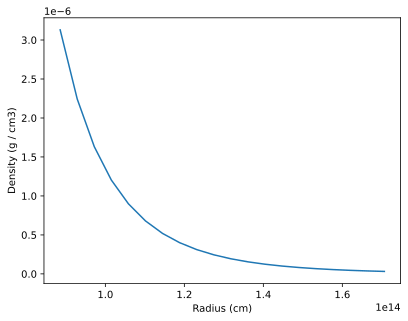

In [4]:
w7_density_config = copy.deepcopy(base_config)

w7_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
w7_density_config.model.structure.type = 'specific'

w7_density_config.model.structure.velocity.start = 1000 * u.km/u.s
w7_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
w7_density_config.model.structure.velocity.num = 20

w7_density_config.model.structure.density.type = 'branch85_w7'

w7_density_model = SimulationState.from_config(w7_density_config, atom_data=atom_data)

print('density:\n', w7_density_model.density)

plt.plot(w7_density_model.r_middle, w7_density_model.density)
plt.xlabel(f'Radius ({w7_density_model.r_middle.unit})')
plt.ylabel(f'Density ({w7_density_model.density.unit})');

In the cell below, we show the time dependence of the W7 density profile by comparing the density plots for models at two different times.

Number of density points larger than number of shells. Assuming inner point irrelevant


density:
 [1.81157579e-06 1.29796899e-06 9.44182418e-07 6.96399579e-07
 5.20200716e-07 3.93144562e-07 3.00339476e-07 2.31741962e-07
 1.80476024e-07 1.41768395e-07 1.12262487e-07 8.95693988e-08
 7.19697525e-08 5.82129873e-08 4.73805252e-08 3.87913652e-08
 3.19362180e-08 2.64310649e-08 2.19840868e-08 1.83718913e-08] g / cm3


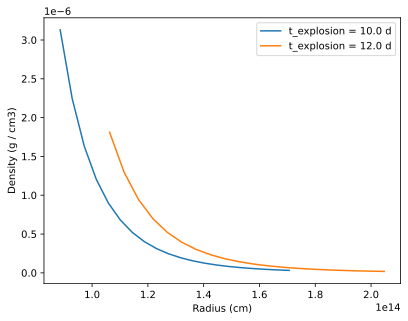

In [5]:
w7_modified_config = copy.deepcopy(w7_density_config)

w7_modified_config.supernova.time_explosion = 12 * u.day

w7_modified_model = SimulationState.from_config(w7_modified_config, atom_data=atom_data)

print('density:\n', w7_modified_model.density)

plt.plot(w7_density_model.r_middle,
         w7_density_model.density,
         label=f't_explosion = {w7_density_config.supernova.time_explosion}')
plt.plot(w7_modified_model.r_middle,
         w7_modified_model.density,
         label=f't_explosion = {w7_modified_config.supernova.time_explosion}')
plt.xlabel(f'Radius ({w7_density_model.r_middle.unit})')
plt.ylabel(f'Density ({w7_density_model.density.unit})')
plt.legend();

For the other density models described below, time dependence works similarly, and readers are encouraged to test out how they change over time. However, for brevity, we omit more explicit examples in this notebook.

### Uniform Density

The uniform density profile sets the density in each shell to a constant value (with respect to velocity/radius). That is,

$$\rho(v,t_0)=\mathrm{value}$$
and thus
$$\rho(v,t_\mathrm{explosion})=\mathrm{value}*\left(\frac{t_0}{t_\mathrm{explosion}}\right)^3.$$

The parameters that can be varied, besides the shell structure, are thus the characteristic time $t_0$, and the value of the density at time $t_0$. The schema can be found [here](../../io/configuration/components/models/index.rst#uniform-density).

Number of density points larger than number of shells. Assuming inner point irrelevant


density:
 [5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10
 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10 5.e-10] g / cm3


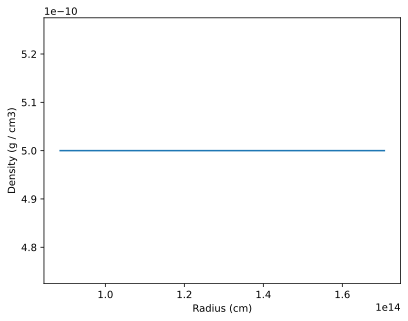

In [6]:
uni_density_config = copy.deepcopy(base_config)

uni_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
uni_density_config.model.structure.type = 'specific'

uni_density_config.model.structure.velocity.start = 1000 * u.km/u.s
uni_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
uni_density_config.model.structure.velocity.num = 20

uni_density_config.model.structure.density.type = 'uniform'
uni_density_config.model.structure.density.time_0 = 1 * u.day
uni_density_config.model.structure.density.value = 5e-10 * u.kg/u.cm**3

uni_density_model = SimulationState.from_config(uni_density_config, atom_data=atom_data)

print('density:\n', uni_density_model.density)

plt.plot(uni_density_model.r_middle, uni_density_model.density)
plt.xlabel(f'Radius ({uni_density_model.r_middle.unit})')
plt.ylabel(f'Density ({uni_density_model.density.unit})');

### Power Law Density

The power law density profile uses the following equation:

$$\rho(v,t_0)=\rho_0\left(\frac{v}{v_0}\right)^{\rm exponent}$$
and thus
$$\rho(v,t_\mathrm{explosion})=\rho_0\left(\frac{v}{v_0}\right)^{\rm exponent}\left(\frac{t_0}{t_\mathrm{explosion}}\right)^3.$$

Thus, the relevant parameters are $t_0$, $\rho_0$, $v_0$, and the exponent. We recommend that the exponent be negative for a sensible density profile. The schema can be found [here](../../io/configuration/components/models/index.rst#power-law-density).

Note here that $\rho_0$ is the density at time $t_0$ and velocity $v_0$.

Number of density points larger than number of shells. Assuming inner point irrelevant


density:
 [1.18976800e-10 1.08166577e-10 9.87654321e-11 9.05387053e-11
 8.32986256e-11 7.68935025e-11 7.11997152e-11 6.61157025e-11
 6.15574023e-11 5.74547544e-11 5.37489922e-11 5.03905266e-11
 4.73372781e-11 4.45533526e-11 4.20079815e-11 3.96746677e-11
 3.75304935e-11 3.55555556e-11 3.37325013e-11 3.20461465e-11] g / cm3


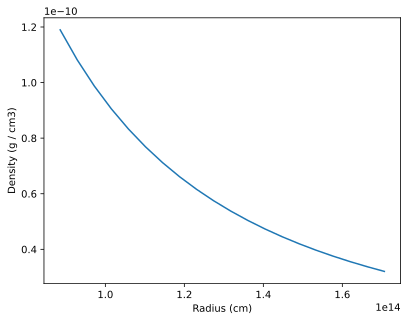

In [7]:
pow_density_config = copy.deepcopy(base_config)

pow_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density.
pow_density_config.model.structure.type = 'specific'

pow_density_config.model.structure.velocity.start = 1000 * u.km/u.s
pow_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
pow_density_config.model.structure.velocity.num = 20

pow_density_config.model.structure.density.type = 'power_law'
pow_density_config.model.structure.density.time_0 = 1 * u.day
pow_density_config.model.structure.density.rho_0 = 5e-10 * u.kg/u.cm**3
pow_density_config.model.structure.density.v_0 = 500 * u.km/u.s
pow_density_config.model.structure.density.exponent = -2

pow_density_model = SimulationState.from_config(pow_density_config, atom_data=atom_data)

print('density:\n', pow_density_model.density)

plt.plot(pow_density_model.r_middle, pow_density_model.density)
plt.xlabel(f'Radius ({pow_density_model.r_middle.unit})')
plt.ylabel(f'Density ({pow_density_model.density.unit})');

### Exponential Density

The exponential density profile uses the following equation:

$$\rho(v,t_0)=\rho_0e^{-v/v_0}$$
and thus
$$\rho(v,t_\mathrm{explosion})=\rho_0e^{-v/v_0}\left(\frac{t_0}{t_\mathrm{explosion}}\right)^3.$$

Thus, the relevant parameters are $t_0$, $\rho_0$, and $v_0$. The schema can be found [here](../../io/configuration/components/models/index.rst#exponential-density).

Note here again that $\rho_0$ is the density at time $t_0$ and velocity $v_0$.

Number of density points larger than number of shells. Assuming inner point irrelevant


density:
 [6.43674518e-11 5.82420789e-11 5.26996123e-11 4.76845811e-11
 4.31467932e-11 3.90408330e-11 3.53256065e-11 3.19639306e-11
 2.89221604e-11 2.61698530e-11 2.36794622e-11 2.14260634e-11
 1.93871039e-11 1.75421771e-11 1.58728182e-11 1.43623198e-11
 1.29955644e-11 1.17588729e-11 1.06398682e-11 9.62735089e-12] g / cm3


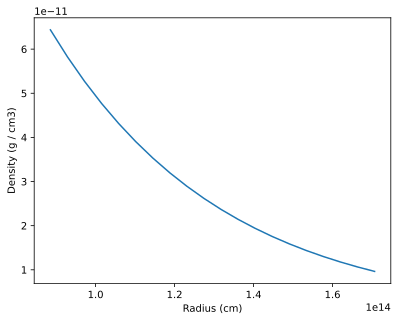

In [8]:
exp_density_config = copy.deepcopy(base_config)

exp_density_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density.
exp_density_config.model.structure.type = 'specific'

exp_density_config.model.structure.velocity.start = 1000 * u.km/u.s
exp_density_config.model.structure.velocity.stop = 2000 * u.km/u.s
exp_density_config.model.structure.velocity.num = 20

exp_density_config.model.structure.density.type = 'exponential'
exp_density_config.model.structure.density.time_0 = 1 * u.day
exp_density_config.model.structure.density.rho_0 = 5e-10 * u.kg/u.cm**3
exp_density_config.model.structure.density.v_0 = 500 * u.km/u.s

exp_density_model = SimulationState.from_config(exp_density_config, atom_data=atom_data)

print('density:\n', exp_density_model.density)

plt.plot(exp_density_model.r_middle, exp_density_model.density)
plt.xlabel(f'Radius ({exp_density_model.r_middle.unit})')
plt.ylabel(f'Density ({exp_density_model.density.unit})');

## Abundance

The `SimulationState` also carries important information about elemental abundances in each shell. These are mass abundances -- that is, the abundance of oxygen is the fraction of the shell's mass that is made up of oxygen.

The only built-in abundance model that TARDIS offers is a uniform abundance, meaning each shell has identical abundances. Like density, however, the [file abundance](../../io/configuration/components/models/index.rst#file-abundance), [CSVY model](../../io/configuration/components/models/index.rst#csvy-model), and [custom abundance widget](../../io/visualization/how_to_abundance_widget.ipynb) methods allow users more freedom with assigning different abundances in each shell.

A table of abundances in each shell is stored in the `abundance` attribute of the `SimulationState` object.

In this first example, the abundances in each shell do not depend on the time after the explosion and are identical to those provided in the configuration.

In [9]:
abund_config = copy.deepcopy(base_config)

abund_config.supernova.time_explosion = 10 * u.day

# We add the abundances in this form to overwrite the elements in the
# base configuration.
abund_config.model.abundances = {'type':'uniform',
                                            'O':.2,
                                            'Ca':.25,
                                            'Mg':.15,
                                            'Si':.3,
                                            'He': .1}

abund_model = SimulationState.from_config(abund_config, atom_data=atom_data)

abund_model.abundance

Number of density points larger than number of shells. Assuming inner point irrelevant


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,,,,,,,,,,,,,,,,,,,,
2,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
8,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20
12,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
14,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30
20,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


In the next example, we show how TARDIS handles radioactive isotopes which are often present in supernovae. Specific isotopes such as `Ni56` (nickel-56 with 28 protons and 28 neutrons) or `Cr51` (chromium-51 with 24 protons and 27 neutrons) can be provided in the configuration.

If any radioactive isotope is provided, the abundances provided are assumed to be the abundances at the time of the explosion. TARDIS then uses [pyne](http://pyne.io) to calculate the decay products of these isotopes after a time $t_\mathrm{explosion}$. This is demonstrated in the example below.

If an isotope mass number is not supplied, TARDIS uses the most stable form of the atom (for example, `Ni` refers to the stable nickel-58).

In [10]:
abund_isotopes_config = copy.deepcopy(base_config)

abund_isotopes_config.supernova.time_explosion = 10 * u.day

abund_isotopes_config.model.structure.velocity.num = 20

abund_isotopes_config.model.abundances = {'type':'uniform',
                                            'O':.3,
                                            'Ni56':.2,
                                            'Ni57':.1,
                                            'Cr51':.4}

abund_isotopes_simulation_state = SimulationState.from_config(abund_isotopes_config, atom_data=atom_data)

abund_isotopes_simulation_state.abundance

Number of density points larger than number of shells. Assuming inner point irrelevant


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,,,,,,,,,,,,,,,,,,,,
8,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000,0.300000
23,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544,0.088544
24,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455,0.311455
26,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002,0.009002
27,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150,0.226150
28,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835,0.064835


## Temperatures

The model also includes information about the temperature of the photosphere/inner boundary, labeled as $T_\mathrm{inner}$, and the temperature of the plasma in each cell, called the radiative temperature and labeled as $T_\mathrm{rad}$. As will be explained, both of these quantities are be updated throughout the simulation, so the calculations in this section are the initial guesses.

TARDIS initially calculates $T_\mathrm{inner}$ as the temperature of a [blackbody](https://en.wikipedia.org/wiki/Black-body_radiation) such that the luminosity of the photosphere (see [initialization](../montecarlo/initialization.ipynb)) matches the requested output luminosity of the entire supernova $L_\mathrm{requested}$, which is specified in the [spectrum configuration](../../io/configuration/components/spectrum.rst):

$$T_{\mathrm{inner}}=\left(\frac{L_\mathrm{requested}}{4 \pi r_{\mathrm{boundary\_inner}}^2 \sigma_{\mathrm{R}}}\right)^{1/4}$$

where $\sigma_{\mathrm{R}}$ is the Stefan-Boltzmann constant and $r_{\mathrm{boundary\_inner}}$ is once again the radius of the photosphere, calculated as part of the shell structure. Because of light-matter interactions, the output luminosity of the supernova will not be the same as the luminosity of the photosphere, so the photospheric temperature is updated throughout the simulation as part of the convergence process in order to match the output luminosity to the requested luminosity (see [Updating Plasma and Convergence](../update_and_conv/update_and_conv.ipynb)).

Next, TARDIS calculates the initial guess for the radiative temperature in each shell. This temperature is also updated throughout the simulation based on light-matter interactions (see once again [Updating Plasma and Convergence](../update_and_conv/update_and_conv.ipynb)). The initial guess for $T_\mathrm{rad}$ is calculated using [Wien's Law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law). Wien's Law states that the temperature of a blackbody is inversely proportional to the blackbody's peak wavelength. The proportionality constant, labeled $b$, is approximately $2.898*10^{-3} m*K$. In equation form,

$$T=\frac{b}{\lambda_\mathrm{peak}}.$$

Since we know $T_\mathrm{inner}$ (from the previous calculation), at the photosphere, we have $\lambda_\mathrm{peak,inner}=\frac{b}{T_\mathrm{inner}}$. Now, when the ejecta is moving at a velocity $v$, $\lambda_\mathrm{peak}$ is doppler shifted (in more technical language, we find the peak wavelength in the co-moving frame, see [reference frames](../montecarlo/propagation.rst#reference-frames)). The doppler factor is (approximately) $1+\frac{\Delta v}{c}$ where $\Delta v$ is the difference between $v$ and the velocity at the photosphere (i.e. $\Delta v = v-v_\mathrm{boundary\_inner}$). So,

$$\lambda_\mathrm{peak}(v)=\left(1+\frac{v-v_\mathrm{boundary\_inner}}{c}\right)\lambda_\mathrm{peak,inner}=\left(1+\frac{v-v_\mathrm{boundary\_inner}}{c}\right)\frac{b}{T_\mathrm{inner}}.$$

Thus, the temperature at a velocity $v$ is

$$T_\mathrm{rad}(v)=\frac{b}{\lambda_\mathrm{peak}(v)}=\frac{T_\mathrm{inner}}{1+\frac{v-v_\mathrm{boundary\_inner}}{c}}.$$

As with density, the radiative temperature is modeled as constant throughout the shell, so we determine the temperature of the shell based on the ejecta's velocity at the center of the shell.

<div class="alert alert-info">
    
Note

Specific initial guesses for the photospheric and radiative temperatures not based on the above calculations can also be input in the [plasma configuration](../../io/configuration/components/plasma.rst) (for both) or in the [CSVY model](../../io/configuration/components/models/index.rst#csvy-model) (radiative temperature only).

</div>

Using the parameters below, we print off the initial photospheric temperature and radiative temperature in each shell, and plot temperature versus radius, including a point for the temperature of the photosphere.

Number of density points larger than number of shells. Assuming inner point irrelevant


t_inner:
 93122.09836905584 K
t_rad:
 [93114.33346946 93098.80755443 93083.28681612 93067.77125196
 93052.26085936 93036.75563572 93021.25557846 93005.76068501
 92990.27095279 92974.78637921 92959.30696169 92943.83269767
 92928.36358457 92912.89961982 92897.44080085 92881.98712509
 92866.53858997 92851.09519294 92835.65693142 92820.22380286] K


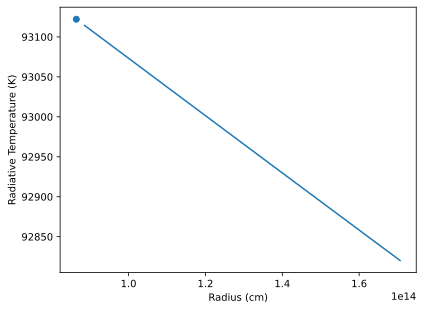

In [11]:
t_rad_config = copy.deepcopy(base_config)

t_rad_config.supernova.time_explosion = 10 * u.day

# In the configuration file, but not here, the luminosity requested can be
# given on a logarithmic scale based on the luminosity of the sun.
t_rad_config.supernova.luminosity_requested = 4e44 * u.erg/u.s

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
t_rad_config.model.structure.type = 'specific'

t_rad_config.model.structure.velocity.start = 1000 * u.km/u.s
t_rad_config.model.structure.velocity.stop = 2000 * u.km/u.s
t_rad_config.model.structure.velocity.num = 20

t_radiative_simulation_state = SimulationState.from_config(t_rad_config, atom_data=atom_data)

print('t_inner:\n', t_radiative_simulation_state.t_inner)
print('t_rad:\n', t_radiative_simulation_state.t_radiative)

plt.plot(t_radiative_simulation_state.r_middle, t_radiative_simulation_state.t_radiative)
plt.scatter(t_radiative_simulation_state.radius[0], t_radiative_simulation_state.t_inner)
plt.xlabel(f'Radius ({t_radiative_simulation_state.r_middle.unit})')
plt.ylabel(f'Radiative Temperature ({t_radiative_simulation_state.t_radiative.unit})');

## Dilution Factor

The dilution factor $W$ describes the fraction of the energy from a blackbody that "reaches" the observer. That is, it is the ratio of the energy density at the observer to the energy density of the blackbody. This heavily depends on light-matter interactions, as matter can shield or amplify the energy coming from the blackbody, in this case the photosphere. However, in the absence of other material, the dilution factor is purely geometric, called the geometric dilution factor. The geometric dilution factor at a point is the fraction of the point's "field of view" that the blackbody takes up, as shown in the figure below.

<img src="../../graphics/dilution_factor.png" width=500>

Using geometry (in 3D, where the photosphere in the figure is a sphere, not a circle), the fraction of the point's "field of view" taken up by the sphere is

$$\frac{1}{2}\left(1-\sqrt{1-\frac{r_\mathrm{boundary\_inner}^2}{r^2}}\right)$$

where $r_\mathrm{boundary\_inner}$ is the radius of the circle in the picture (the photosphere in terms of TARDIS). This is the geometric dilution factor.


Like the radiative temperature, the dilution factor in each cell changes throughout the simulation based on the light-matter interactions (see [Updating Plasma and Convergence](../update_and_conv/update_and_conv.ipynb)). TARDIS uses the geometric dilution factor as the initial guess for the dilution factor in each cell, plugging in the radius at the center of the cell to determine the initial dilution factor in the cell. 

<div class="alert alert-info">
    
Note

An initial guess for the dilution factor in each cell not based on the geometric dilution factor can be input via the [CSVY model](../../io/configuration/components/models/index.rst#csvy-model).

</div>

We print off the dilution factor in each cell and plot the dilution factor versus radius for a certain shell structure:

Number of density points larger than number of shells. Assuming inner point irrelevant


dilution_factor: [0.3902439  0.31651472 0.27093858 0.23746888 0.21120466 0.1898178
 0.17197474 0.15682571 0.14379052 0.13245342 0.12250561 0.11371132
 0.10588651 0.09888494 0.09258861 0.08690114 0.08174289 0.07704742
 0.07275885 0.06882984]


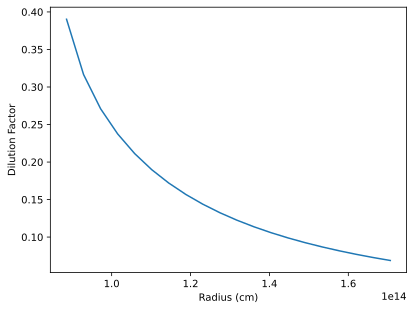

In [12]:
dilution_factor_config = copy.deepcopy(base_config)

dilution_factor_config.supernova.time_explosion = 10 * u.day

# This line is necessary to indicate we are using a built-in shell structure
# and density. Do not change it.
dilution_factor_config.model.structure.type = 'specific'

dilution_factor_config.model.structure.velocity.start = 1000 * u.km/u.s
dilution_factor_config.model.structure.velocity.stop = 2000 * u.km/u.s
dilution_factor_config.model.structure.velocity.num = 20

dilution_factor_simulation_state = SimulationState.from_config(dilution_factor_config, atom_data=atom_data)

print(f'dilution_factor: {dilution_factor_simulation_state.dilution_factor}')

plt.plot(dilution_factor_simulation_state.r_middle, dilution_factor_simulation_state.dilution_factor)
plt.xlabel(f'Radius ({dilution_factor_simulation_state.r_middle.unit})')
plt.ylabel(f'Dilution Factor');